C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=28.7) + WhiteKernel(noise_level=1e-10)


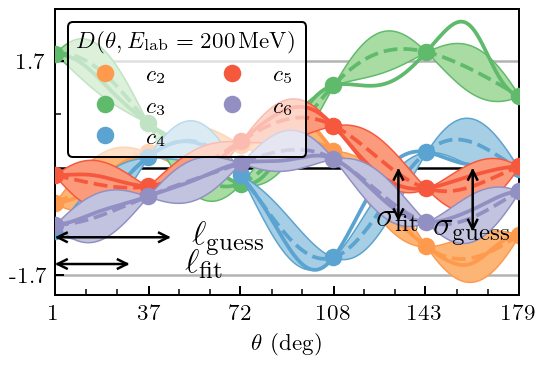

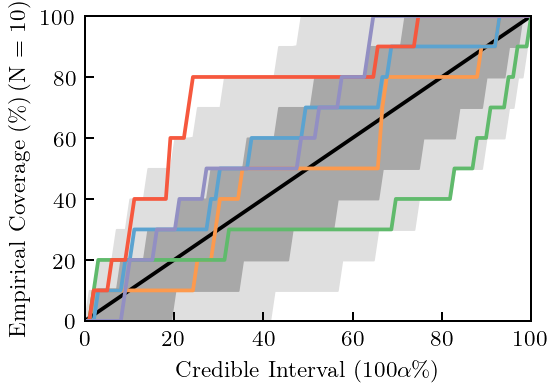

In [1]:
from cheftgp.eft import *
from cheftgp.gaussianprocess import *
from cheftgp.graphs import *
from cheftgp.scattering import *
from cheftgp.utils import *
from scripts.diagnostics_script import *
import scipy

## Plot for all $Q$ prescriptions against $p_{\rm rel}$

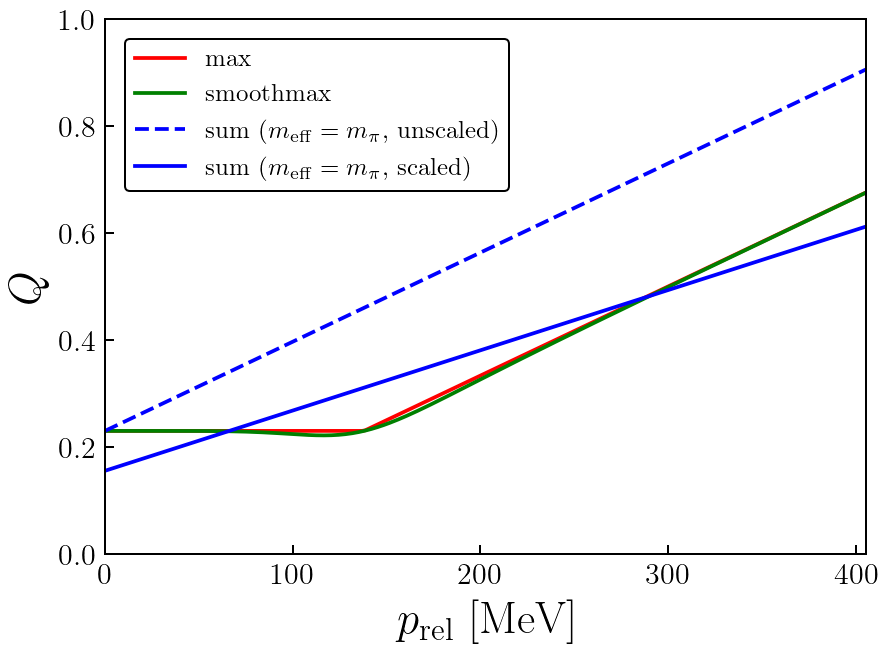

In [2]:
Elab_array = np.linspace(0, 350, 351)

fig, ax = plt.subplots(figsize = (5.1, 3.8))

Lambdab = 600

ax.plot(E_to_p(Elab_array, 'np'), Q_approx(E_to_p(Elab_array, "np"), "max", Lambda_b=Lambdab, m_pi = 138), 
        c = 'red', label = "max")
ax.plot(E_to_p(Elab_array, 'np'), Q_approx(E_to_p(Elab_array, "np"), "smax", Lambda_b=Lambdab, m_pi = 138), 
        c = 'green', label = "smoothmax")
ax.plot(E_to_p(Elab_array, 'np'), Q_approx(E_to_p(Elab_array, "np"), "rawsum", Lambda_b=Lambdab, m_pi = 138), 
        c = 'blue', label = r'sum ($m_{\mathrm{eff}} = m_{\pi}$, unscaled)', ls='--')
ax.plot(E_to_p(Elab_array, 'np'), Q_approx(E_to_p(Elab_array, "np"), "sum", Lambda_b=Lambdab, m_pi = 138), 
        c = 'blue', label = r'sum ($m_{\mathrm{eff}} = m_{\pi}$, scaled)')

axis_font = {'size':'18'}
ax.set_xlabel(r'$p_{\mathrm{rel}}$ [MeV]', **axis_font)
ax.set_ylabel(r'$Q$', **axis_font)
ax.set_ylim(0, 1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc = 'upper left', prop={'size': 10}, ncol = 1, columnspacing = 0.2)
fig.tight_layout()
fig.savefig('figures/Qparamvsprel.png')

## Evaluates the ratio $Q_{\rm sum} / Q_{\rm smax}$ over the relevant range in momentum and compares to a linear fit function

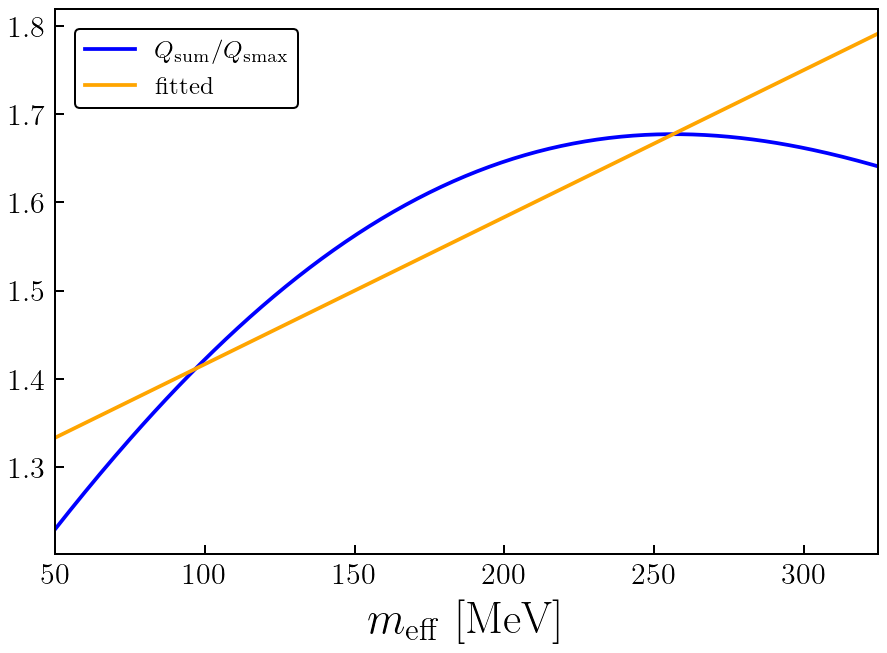

In [3]:
def Qcomparison(prel, Lambda_b, mpi):
    return scipy.integrate.trapz(
            Q_approx(prel, "rawsum", 
                Lambda_b, 
                m_pi = mpi, 
                single_expansion = False), prel) / \
        scipy.integrate.trapz(
            Q_approx(prel, "smax", 
                Lambda_b, 
                m_pi = mpi, 
                single_expansion = False), prel)
            

Elab_array = np.linspace(1, 350, 350)
prel_array = E_to_p(Elab_array, 'np')
mpi_array = np.linspace(50, 325, 276)

fig, ax = plt.subplots(figsize = (5.1, 3.8))

Lambdab = 600

ax.plot(mpi_array, [Qcomparison(prel_array, Lambdab, m) for m in mpi_array], 
        c = 'blue', label = r'$Q_{\mathrm{sum}}/Q_{\mathrm{smax}}$')
ax.plot(mpi_array, Qsum_to_Qsmoothmax(mpi_array), 
        c = 'orange', label = 'fitted')

axis_font = {'size':'18'}
ax.set_xlabel(r'$m_{\mathrm{eff}}$ [MeV]', **axis_font)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc = 'upper left', prop={'size': 10}, ncol = 1, columnspacing = 0.2)
fig.tight_layout()
fig.savefig('figures/QsumQsmax.png')

## Plots graphical and statistical diagnostics for all figures in the paper

The fitted kernel is RBF(length_scale=48.8) + WhiteKernel(noise_level=1e-10)


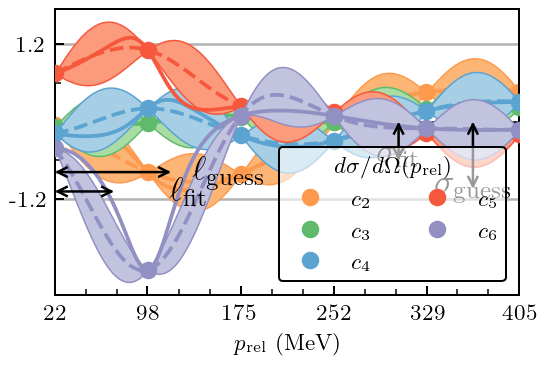

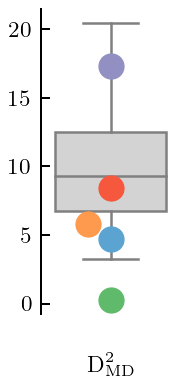

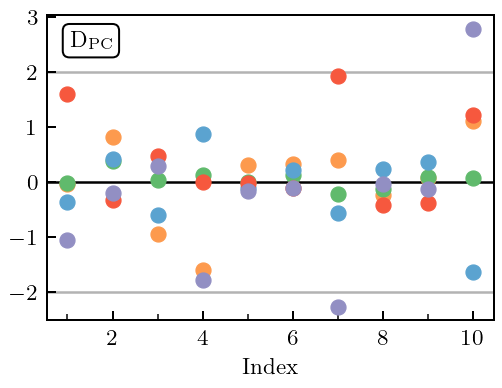

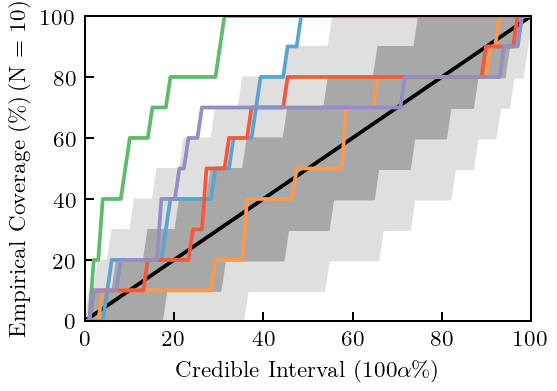

In [4]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["DSG"],
    E_input_array=[],
    deg_input_array=[60],
    Q_param_method_array=["smax"],
    p_param_method_array=["Qofprel"],
    input_space_input=["prel"],
    train_test_split_array=[Allenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=106,
    Lambdab=377,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=90.2) + WhiteKernel(noise_level=1e-10)


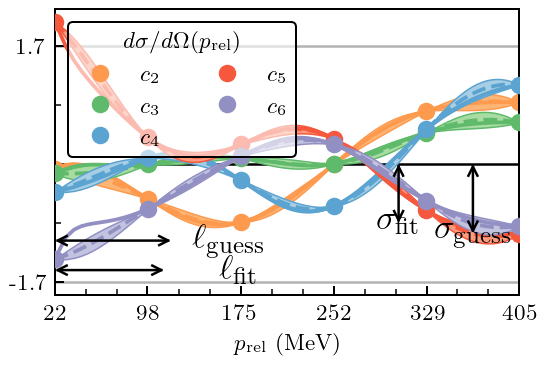

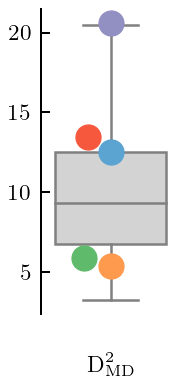

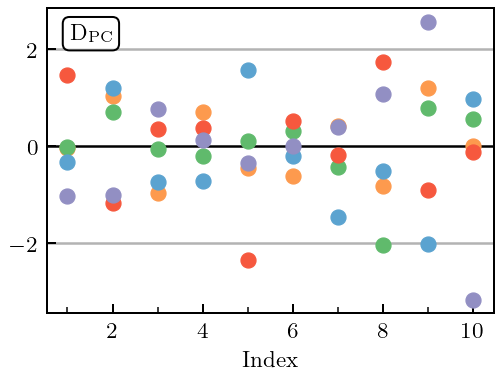

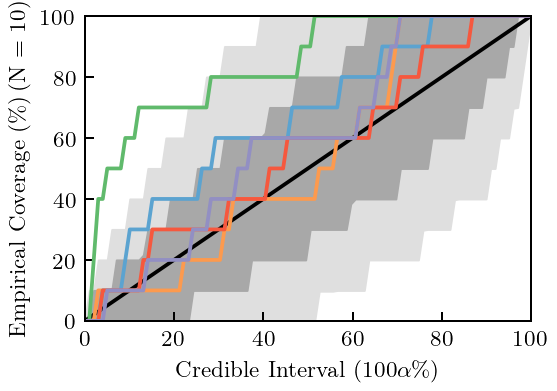

In [5]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["DSG"],
    E_input_array=[],
    deg_input_array=[60],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["prel"],
    train_test_split_array=[Allenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=480,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=0.278) + WhiteKernel(noise_level=1e-10)


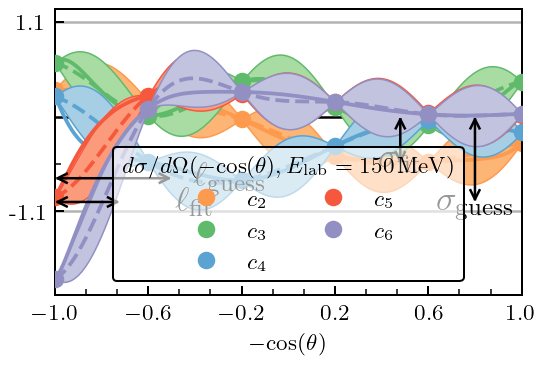

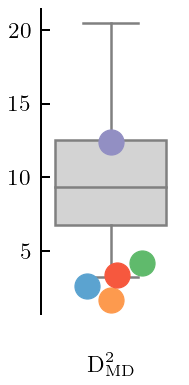

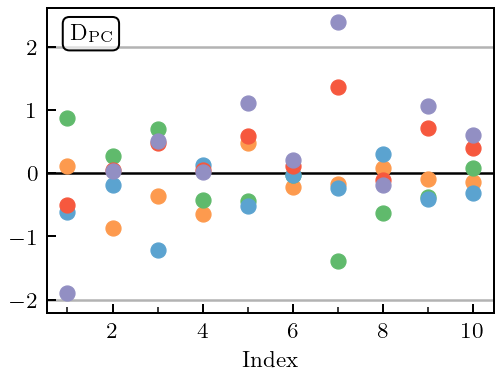

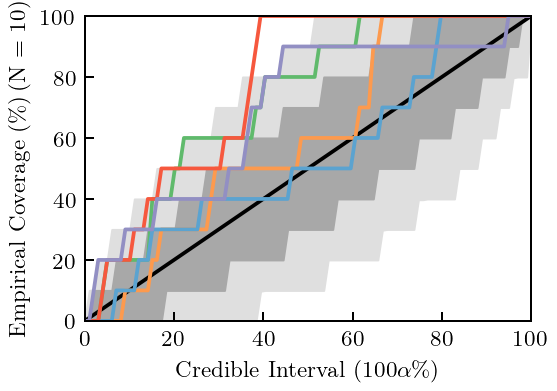

In [6]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["DSG"],
    E_input_array=[150],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofpq"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=177,
    Lambdab=546,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=0.323) + WhiteKernel(noise_level=1e-10)


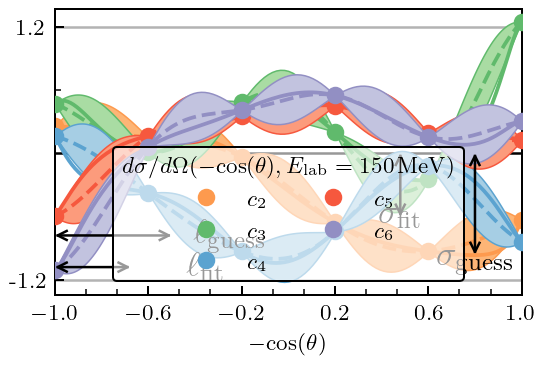

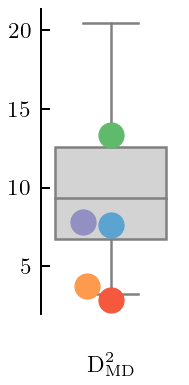

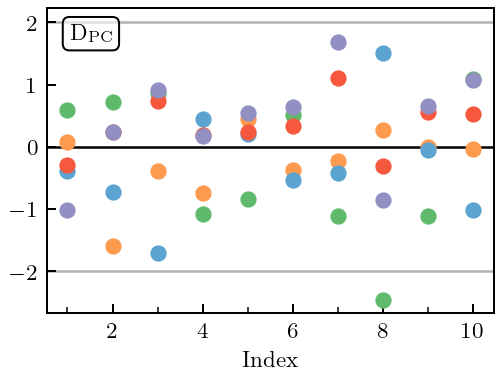

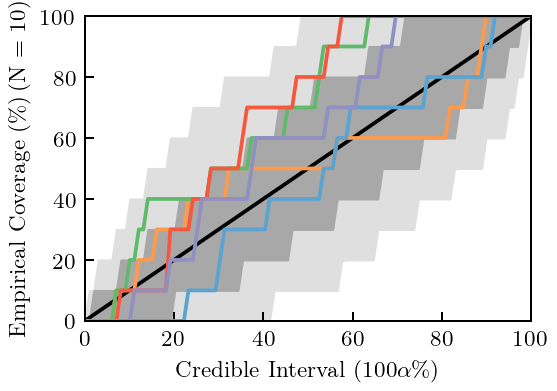

In [7]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["DSG"],
    E_input_array=[150],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=480,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=102) + WhiteKernel(noise_level=1e-10)


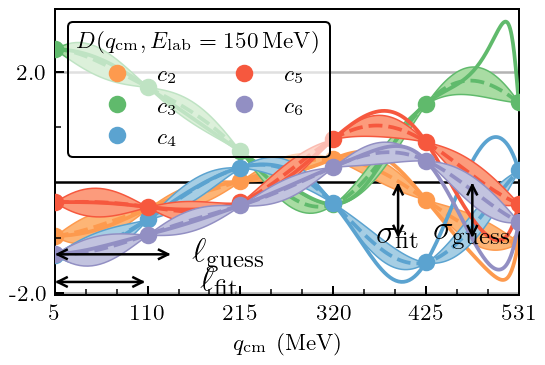

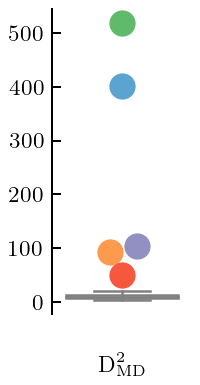

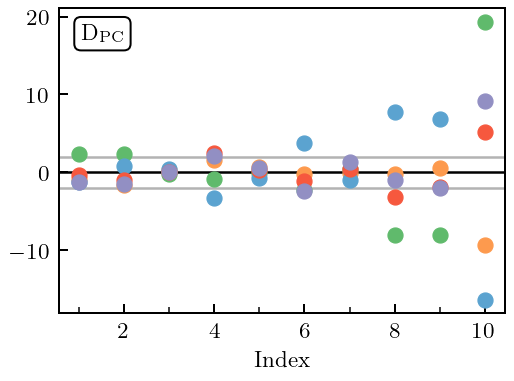

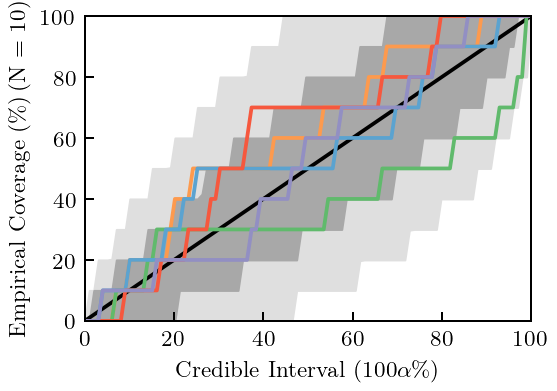

In [8]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["D"],
    E_input_array=[150],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["qcm"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=183,
    Lambdab=540,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=0.381) + WhiteKernel(noise_level=1e-10)


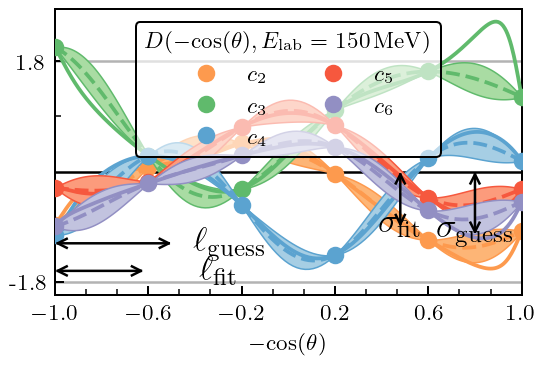

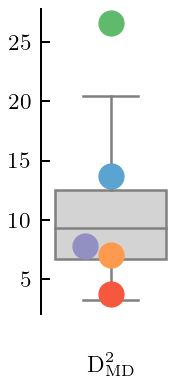

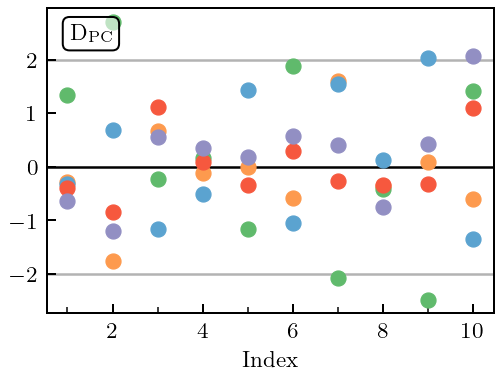

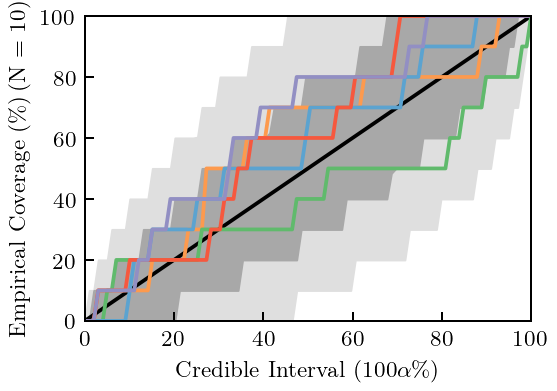

In [9]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["D"],
    E_input_array=[150],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=480,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=82) + WhiteKernel(noise_level=1e-10)


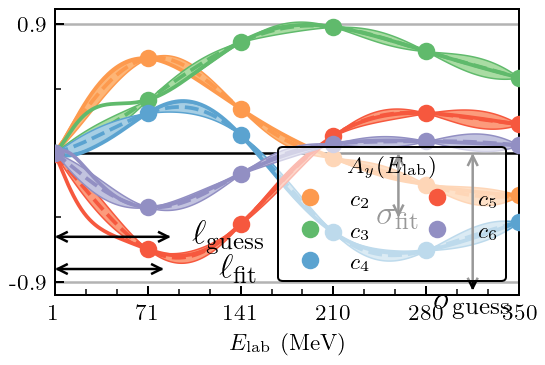

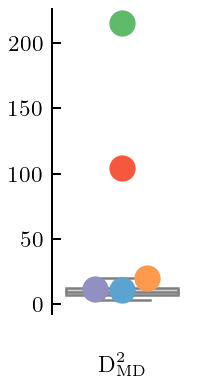

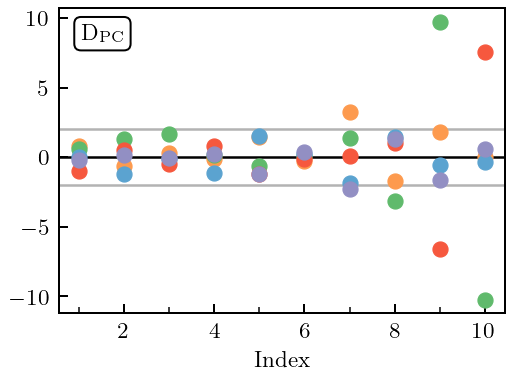

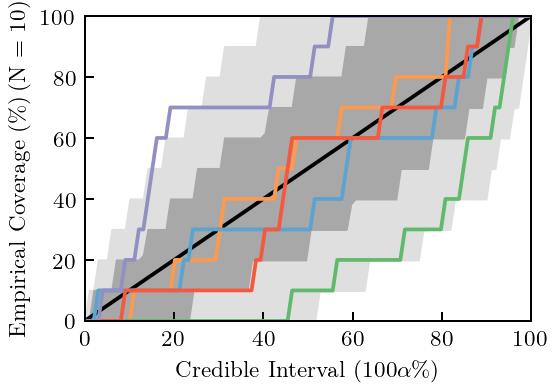

In [10]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AY"],
    E_input_array=[],
    deg_input_array=[45],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["Elab"],
    train_test_split_array=[Allenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=189,
    Lambdab=517,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=79.9) + WhiteKernel(noise_level=1e-10)


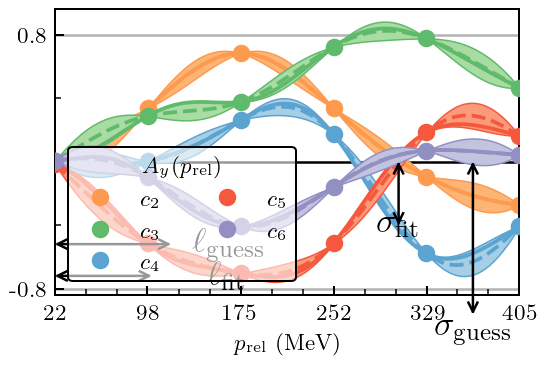

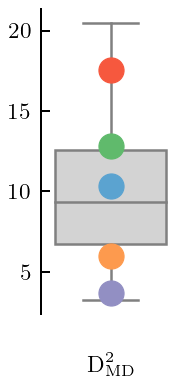

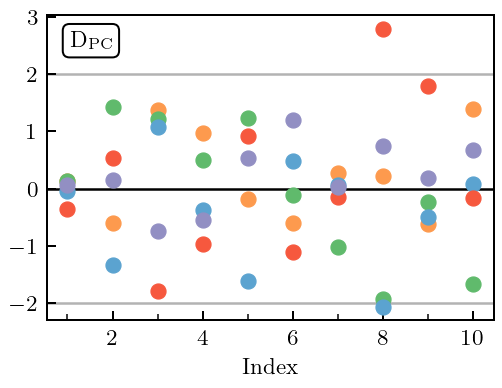

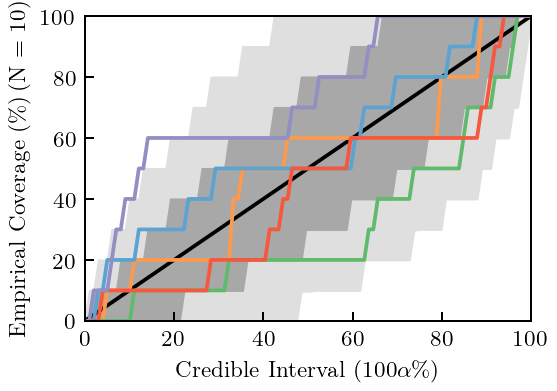

In [11]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AY"],
    E_input_array=[],
    deg_input_array=[45],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["prel"],
    train_test_split_array=[Allenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=480,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=93) + WhiteKernel(noise_level=1e-10)


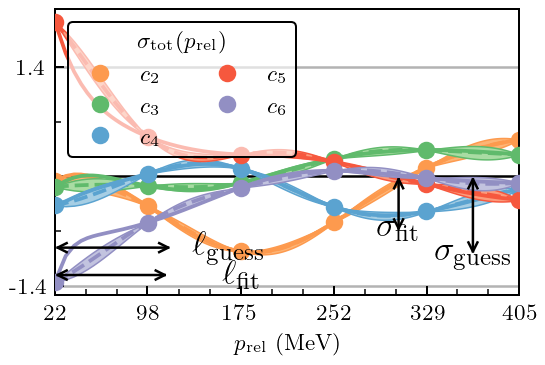

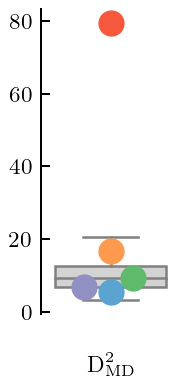

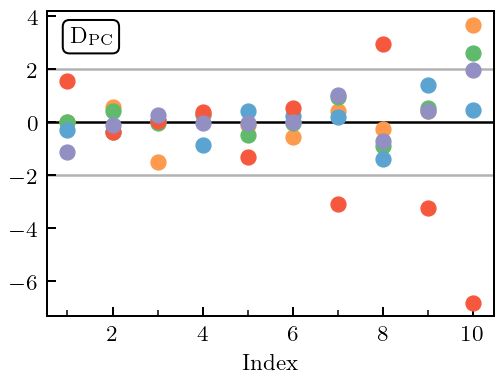

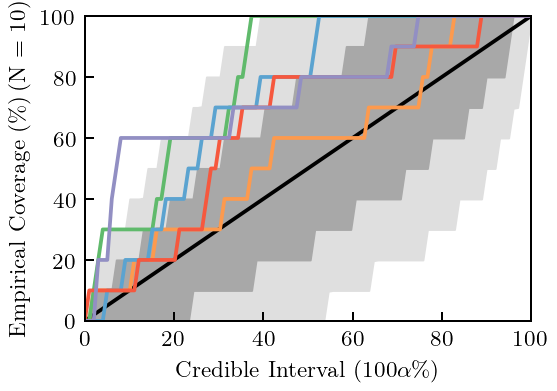

In [12]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["SGT"],
    E_input_array=[],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["prel"],
    train_test_split_array=[Allenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=480,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=84) + WhiteKernel(noise_level=1e-10)


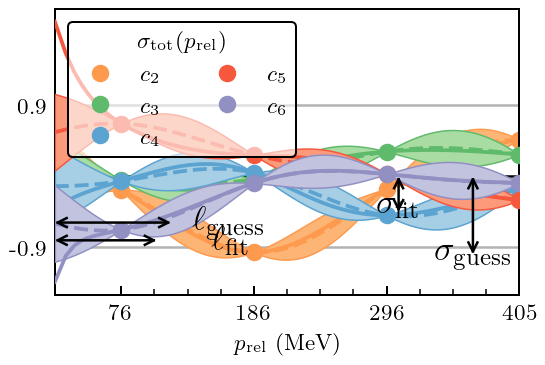

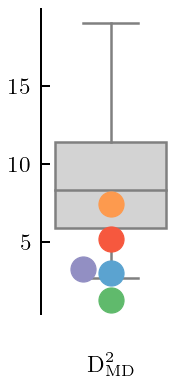

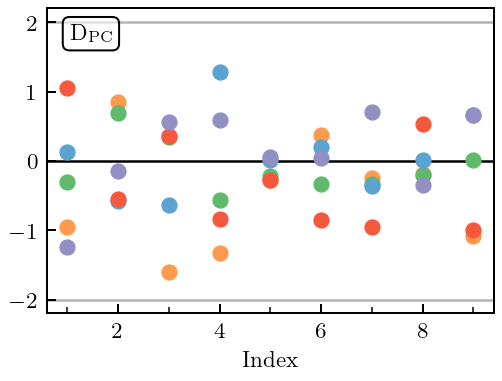

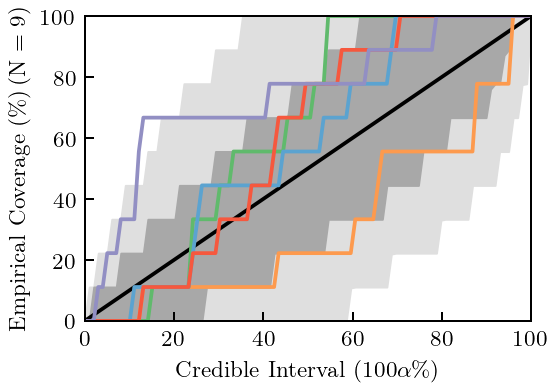

In [13]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["SGT"],
    E_input_array=[],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["prel"],
    train_test_split_array=[Nolowenergysplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=480,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=0.515) + WhiteKernel(noise_level=1e-06)


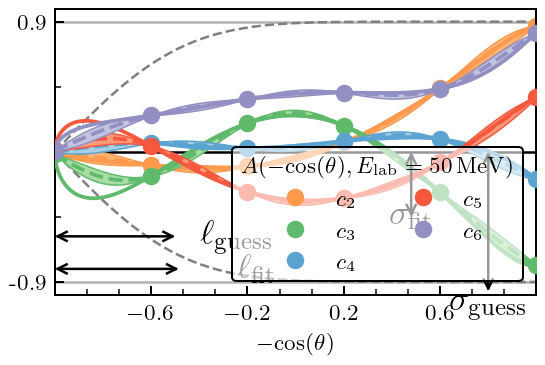

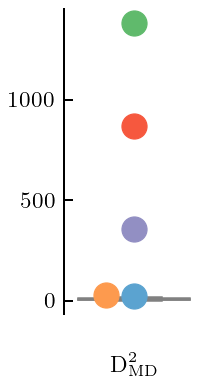

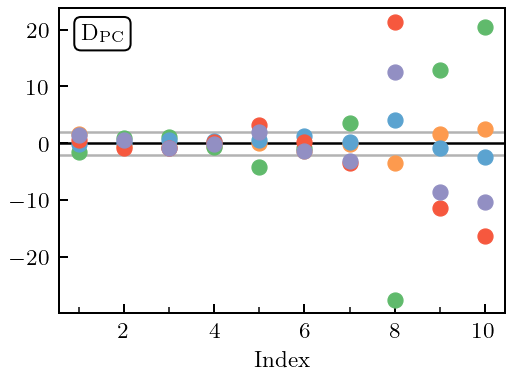

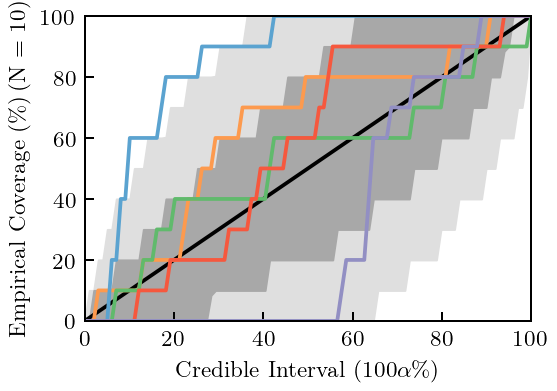

In [14]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["A"],
    E_input_array=[50],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=480,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=0.71) + WhiteKernel(noise_level=1e-06)


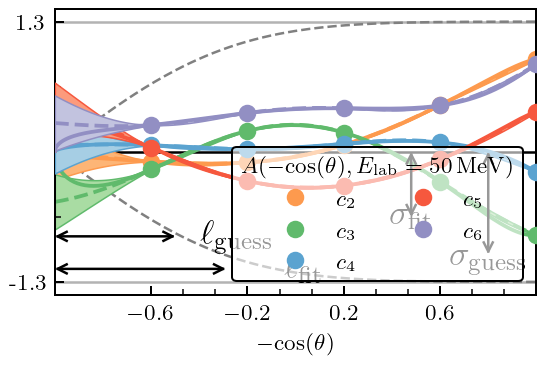

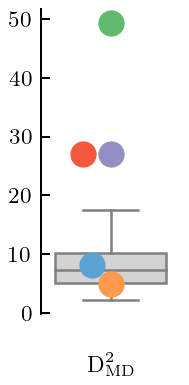

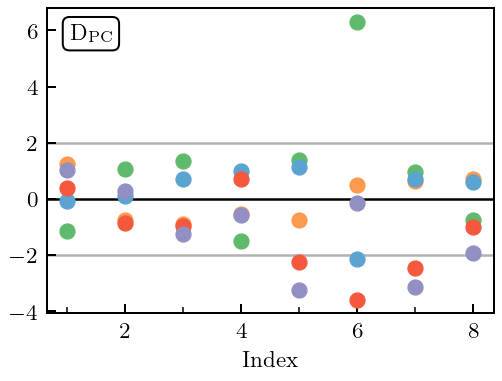

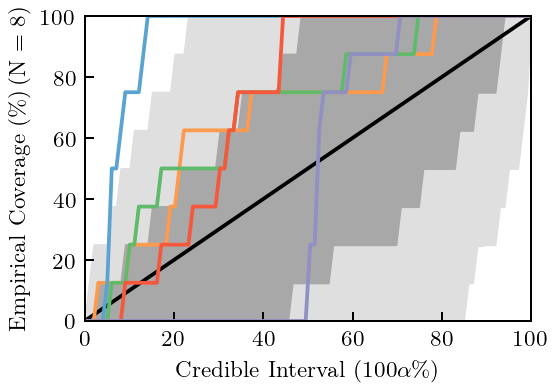

In [15]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["A"],
    E_input_array=[50],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Backwardanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=480,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=46.5) + WhiteKernel(noise_level=1e-06)


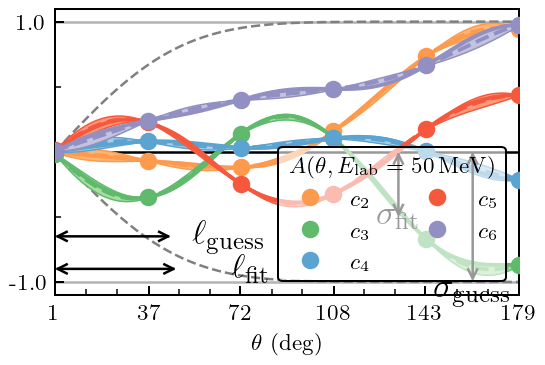

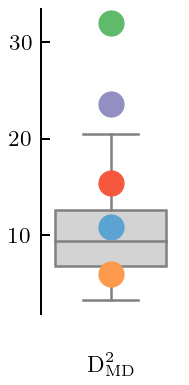

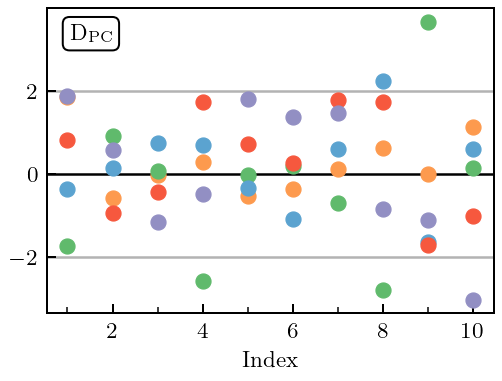

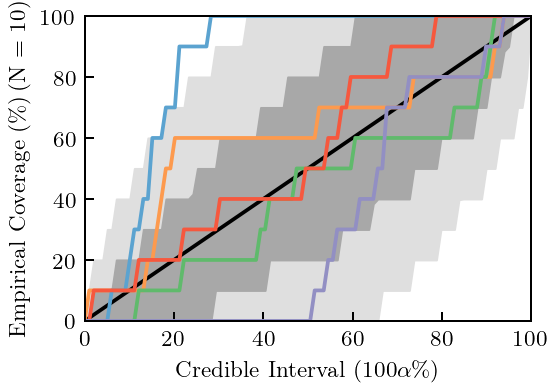

In [16]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["A"],
    E_input_array=[50],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["deg"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=148,
    Lambdab=499,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=0.314) + WhiteKernel(noise_level=1e-10)


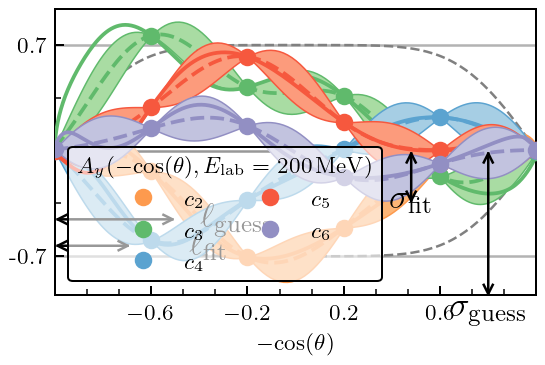

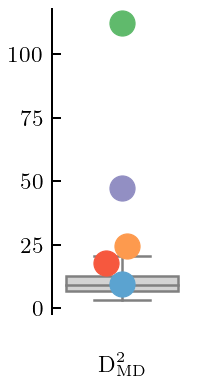

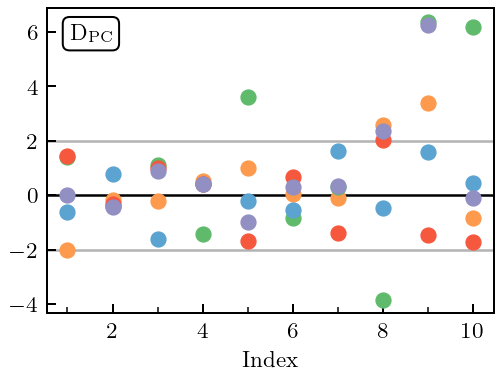

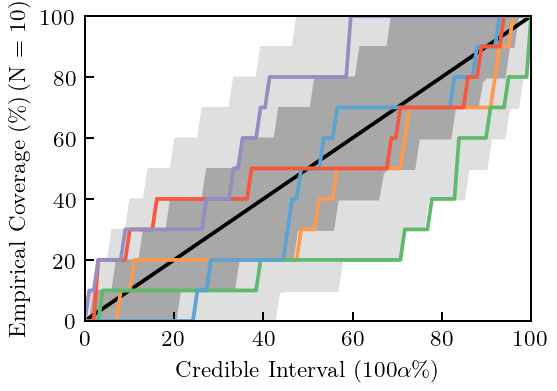

In [17]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AY"],
    E_input_array=[200],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=480,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=0.388) + WhiteKernel(noise_level=1e-10)


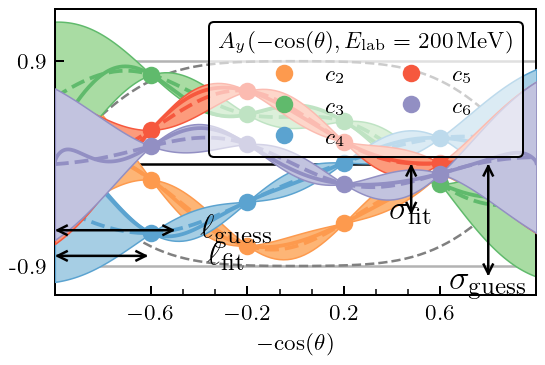

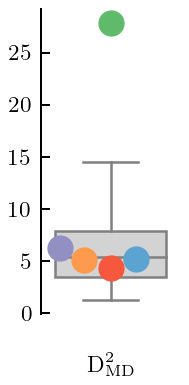

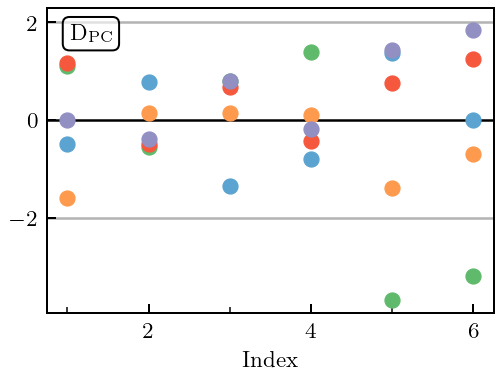

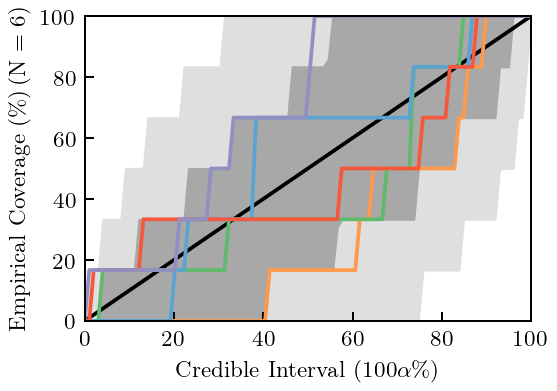

In [18]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AY"],
    E_input_array=[200],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Middleanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=480,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=20) + WhiteKernel(noise_level=1e-10)


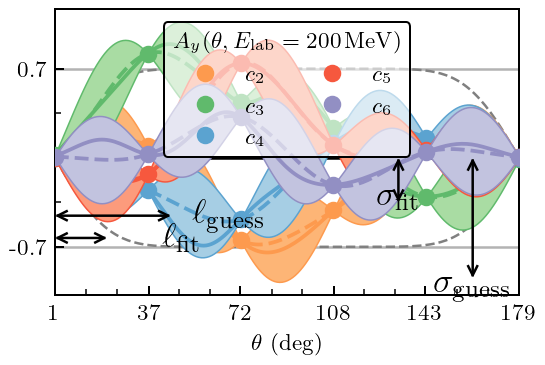

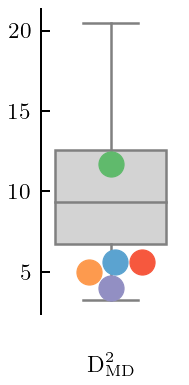

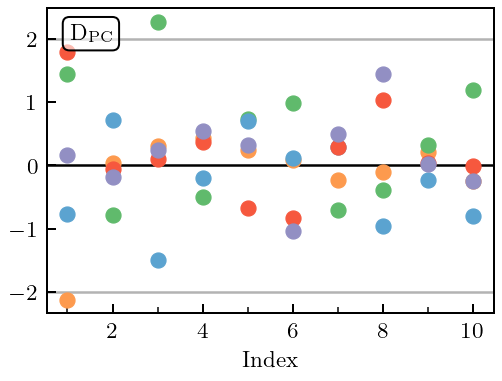

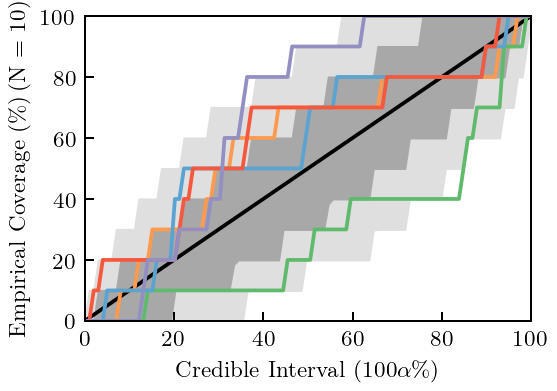

In [19]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AY"],
    E_input_array=[200],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["deg"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=148,
    Lambdab=499,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=0.164) + WhiteKernel(noise_level=1e-10)


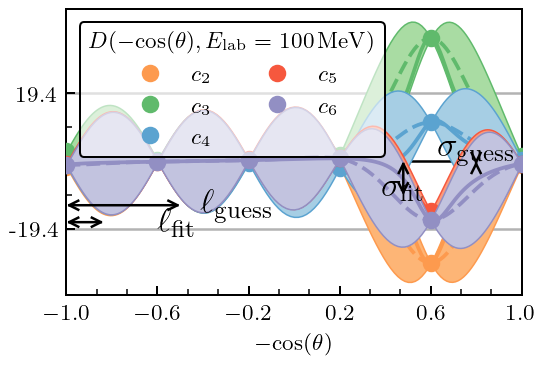

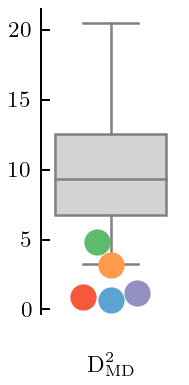

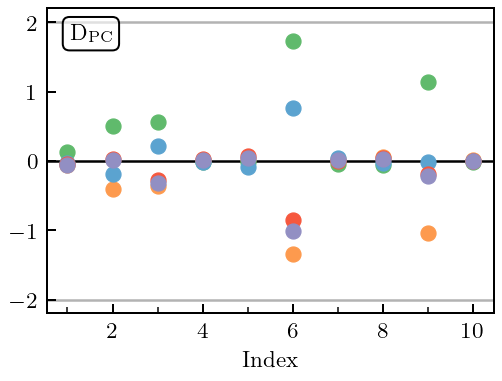

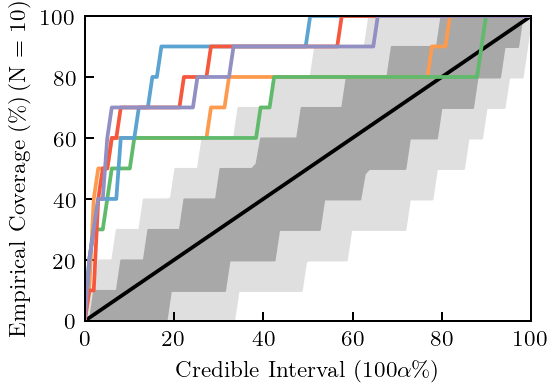

In [20]:
# needs to be the "yref != 1" D
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["D_dimensionful"],
    E_input_array=[100],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=480,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0_badref",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=0.408) + WhiteKernel(noise_level=1e-10)


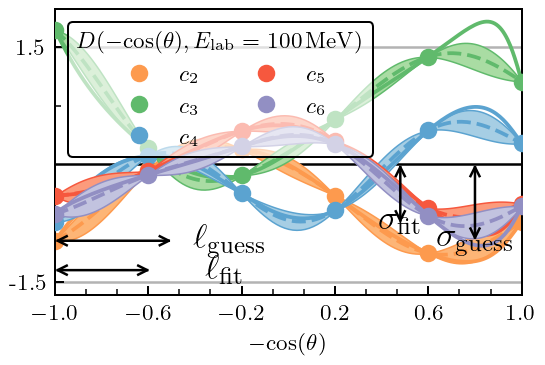

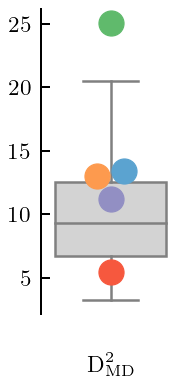

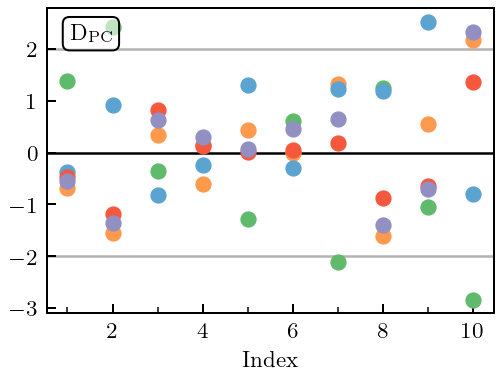

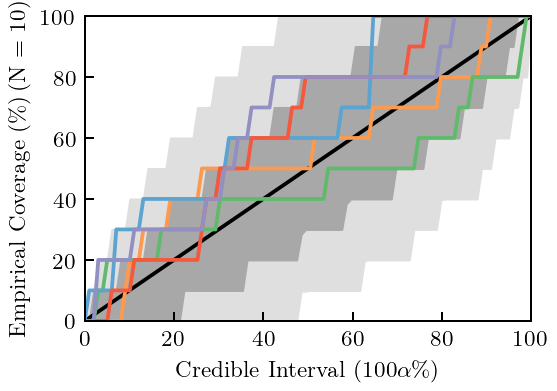

In [21]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["D"],
    E_input_array=[100],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=480,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=0.527) + WhiteKernel(noise_level=1e-06)


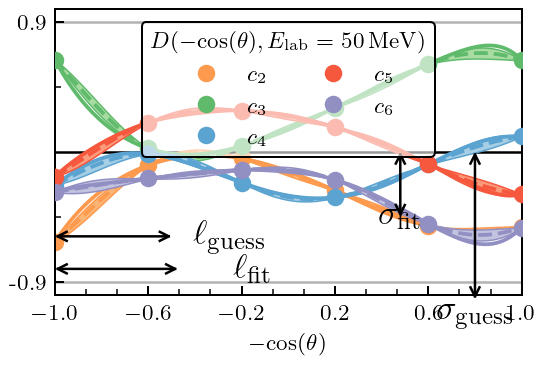

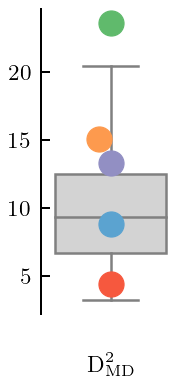

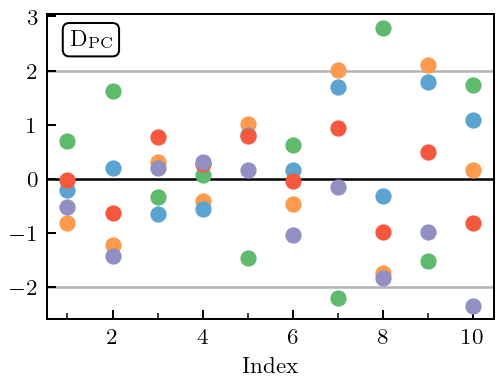

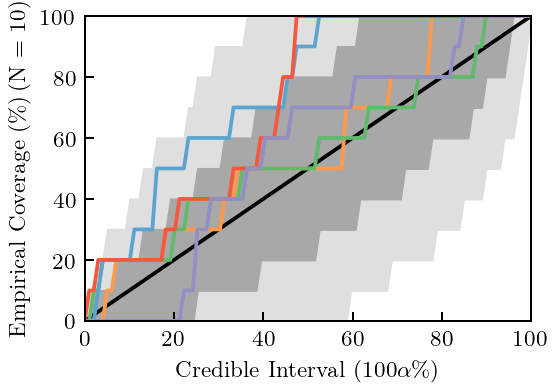

In [22]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["D"],
    E_input_array=[50],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=480,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=0.313) + WhiteKernel(noise_level=1e-10)


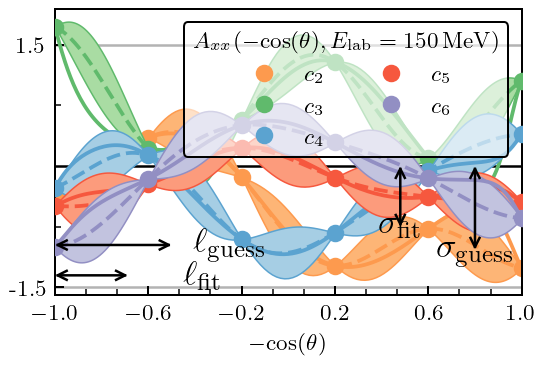

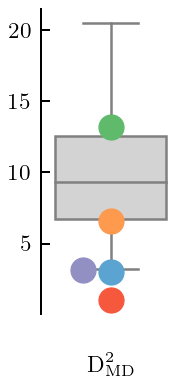

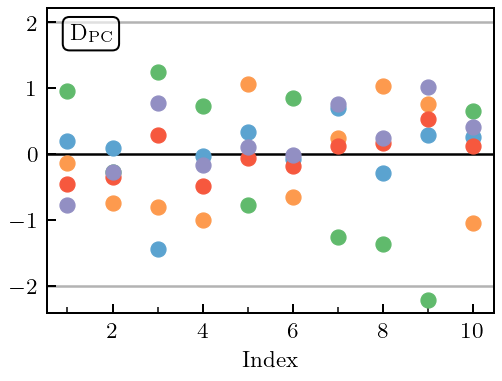

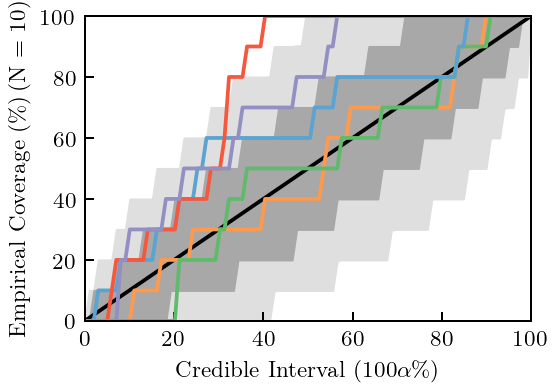

In [23]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AXX"],
    E_input_array=[150],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=480,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=0.699) + WhiteKernel(noise_level=1e-06)


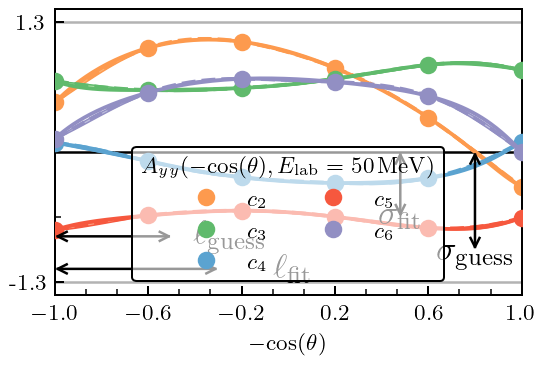

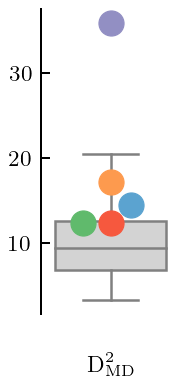

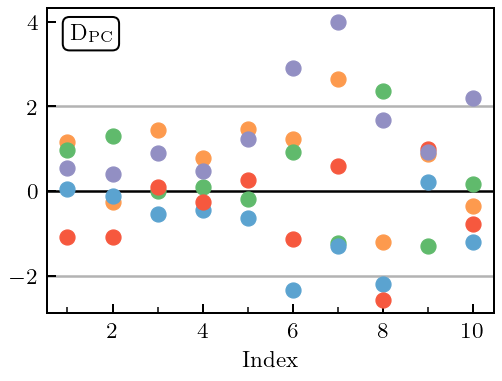

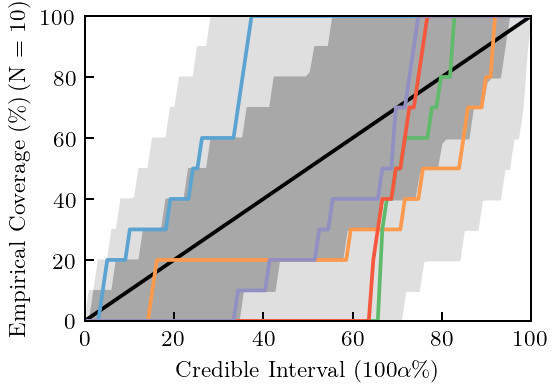

In [24]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AYY"],
    E_input_array=[50],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=141,
    Lambdab=480,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0",
)

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:894: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([8.95878602e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 34, 'nit': 4, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


The fitted kernel is RBF(length_scale=0.731) + WhiteKernel(noise_level=1e-06)


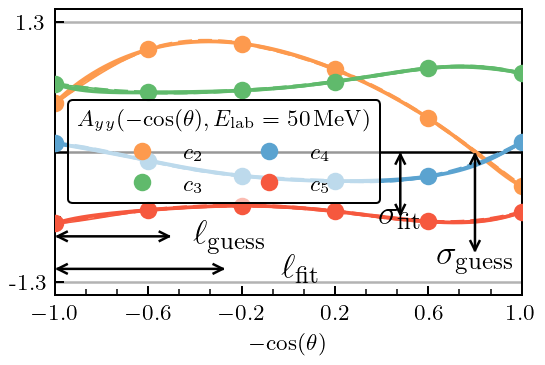

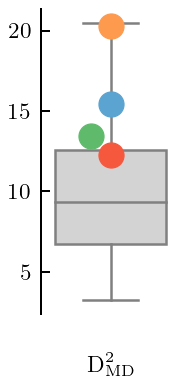

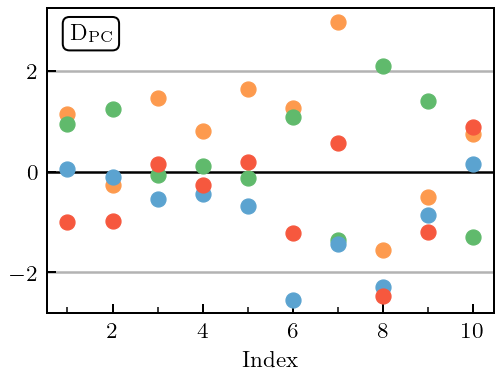

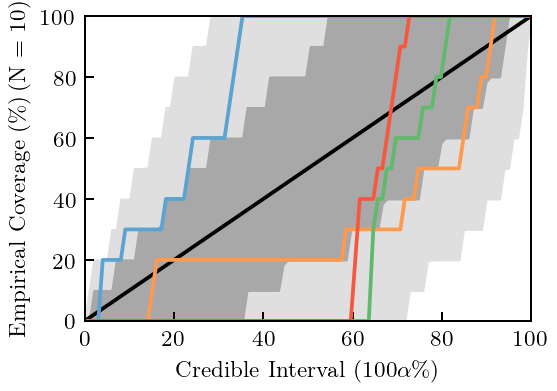

In [25]:
generate_diagnostics(
    nn_interaction="np",
    scale_scheme_bunch_array=[RKE500MeV],
    observable_input=["AYY"],
    E_input_array=[50],
    deg_input_array=[],
    Q_param_method_array=["sum"],
    p_param_method_array=["Qofprel"],
    input_space_input=["cos"],
    train_test_split_array=[Fullspaceanglessplit1],
    orders_excluded=[6],
    orders_names_dict=None,
    orders_labels_dict=None,
    # length_scale_input=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleTlabInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    LengthScaleDegInput=LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True),
    fixed_sd=None,
    m_pi_eff=123,
    Lambdab=449,
    print_all_classes=False,
    savefile_type="png",
    plot_coeffs_bool=True,
    plot_md_bool=True,
    plot_pc_bool=True,
    plot_ci_bool=True,
    plot_pdf_bool=False,
    plot_trunc_bool=False,
    plot_plotzilla_bool=False,
    save_coeffs_bool=True,
    save_md_bool=True,
    save_pc_bool=True,
    save_ci_bool=True,
    save_pdf_bool=False,
    save_trunc_bool=False,
    save_plotzilla_bool=False,
    filename_addendum="_paper_0_noc6",
)